<a href="https://colab.research.google.com/github/Mercymerine/Machine_Learning_1/blob/main/cap_earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
earthquake = pd.read_csv('/content/all_month.csv')
earthquake.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-06-23T02:43:55.360Z,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127000,0.23,...,2024-06-23T02:45:57.808Z,"20 km NE of Warner Springs, CA",earthquake,0.90,1.71,0.205,7.0,automatic,ci,ci
1,2024-06-23T02:36:14.460Z,38.834835,-122.807335,2.21,1.28,md,27.0,50.0,0.011620,0.02,...,2024-06-23T02:37:51.798Z,"7 km WNW of Cobb, CA",earthquake,0.20,0.38,0.180,27.0,automatic,nc,nc
2,2024-06-23T02:28:48.780Z,38.840168,-122.873001,1.87,0.27,md,8.0,97.0,0.003424,0.05,...,2024-06-23T02:30:27.436Z,"12 km NW of The Geysers, CA",earthquake,0.71,1.08,0.170,8.0,automatic,nc,nc
3,2024-06-23T02:28:34.590Z,19.390333,-155.253326,0.67,1.89,md,18.0,49.0,0.005162,0.12,...,2024-06-23T02:30:14.310Z,"6 km SSW of Volcano, Hawaii",earthquake,0.15,0.20,0.250,13.0,automatic,hv,hv
4,2024-06-23T02:23:14.910Z,38.777168,-122.766335,1.11,1.02,md,9.0,88.0,0.006454,0.02,...,2024-06-23T02:24:50.430Z,"1 km W of The Geysers, CA",earthquake,0.30,0.49,0.270,10.0,automatic,nc,nc


In [3]:
earthquake.shape

(10037, 22)

In [69]:
earthquake['mag'].unique()

array([ 1.03      ,  1.28      ,  0.27      ,  1.88999999,  1.02      ,
        1.48      ,  1.87      ,  1.6       ,  1.26      ,  1.16      ,
        0.77      ,  1.49      ,  2.3       ,  1.14      ,  1.578704  ,
        0.29      ,  2.36999989,  1.74000001,  1.3       ,  1.        ,
        2.35      ,  1.7       ,  0.79      ,  1.1       ,  1.35      ,
        2.46      ,  1.84000003,  1.83000004,  0.7       ,  1.8       ,
        0.75      ,  2.6       ,  1.59      ,  1.5       ,  2.24      ,
       -0.1       ,  0.8       ,  1.72000003,  0.95      ,  3.1       ,
        5.1       ,  0.44      ,  0.76      ,  3.88      ,  0.63      ,
        2.26      ,  0.09      ,  1.2       ,  2.27      ,  0.62      ,
        1.78      ,  2.02999997,  0.66      ,  1.81      ,  1.76      ,
        2.41      ,  1.55      ,  2.33      ,  0.82      ,  4.4       ,
        1.08      ,  4.3       ,  1.24      ,  0.15      ,  0.07      ,
        1.4       ,  1.56      ,  4.6       ,  2.1       ,  1.85

In [4]:
earthquake['type'].unique()

array(['earthquake', 'quarry blast', 'explosion', 'other event',
       'ice quake'], dtype=object)

In [5]:
earthquake.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

**DATA CLEANING**

In [6]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10037 non-null  object 
 1   latitude         10037 non-null  float64
 2   longitude        10037 non-null  float64
 3   depth            10037 non-null  float64
 4   mag              10037 non-null  float64
 5   magType          10037 non-null  object 
 6   nst              8568 non-null   float64
 7   gap              8568 non-null   float64
 8   dmin             8555 non-null   float64
 9   rms              10037 non-null  float64
 10  net              10037 non-null  object 
 11  id               10037 non-null  object 
 12  updated          10037 non-null  object 
 13  place            10037 non-null  object 
 14  type             10037 non-null  object 
 15  horizontalError  7886 non-null   float64
 16  depthError       10037 non-null  float64
 17  magError    

In [7]:
earthquake.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1469
gap                1469
dmin               1482
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2151
depthError            0
magError           1512
magNst             1469
status                0
locationSource        0
magSource             0
dtype: int64

In [8]:
missing_percent = earthquake.isnull().mean()*100
missing_percent

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magType             0.000000
nst                14.635847
gap                14.635847
dmin               14.765368
rms                 0.000000
net                 0.000000
id                  0.000000
updated             0.000000
place               0.000000
type                0.000000
horizontalError    21.430706
depthError          0.000000
magError           15.064262
magNst             14.635847
status              0.000000
locationSource      0.000000
magSource           0.000000
dtype: float64

In [9]:
import missingno as msno

<Axes: >

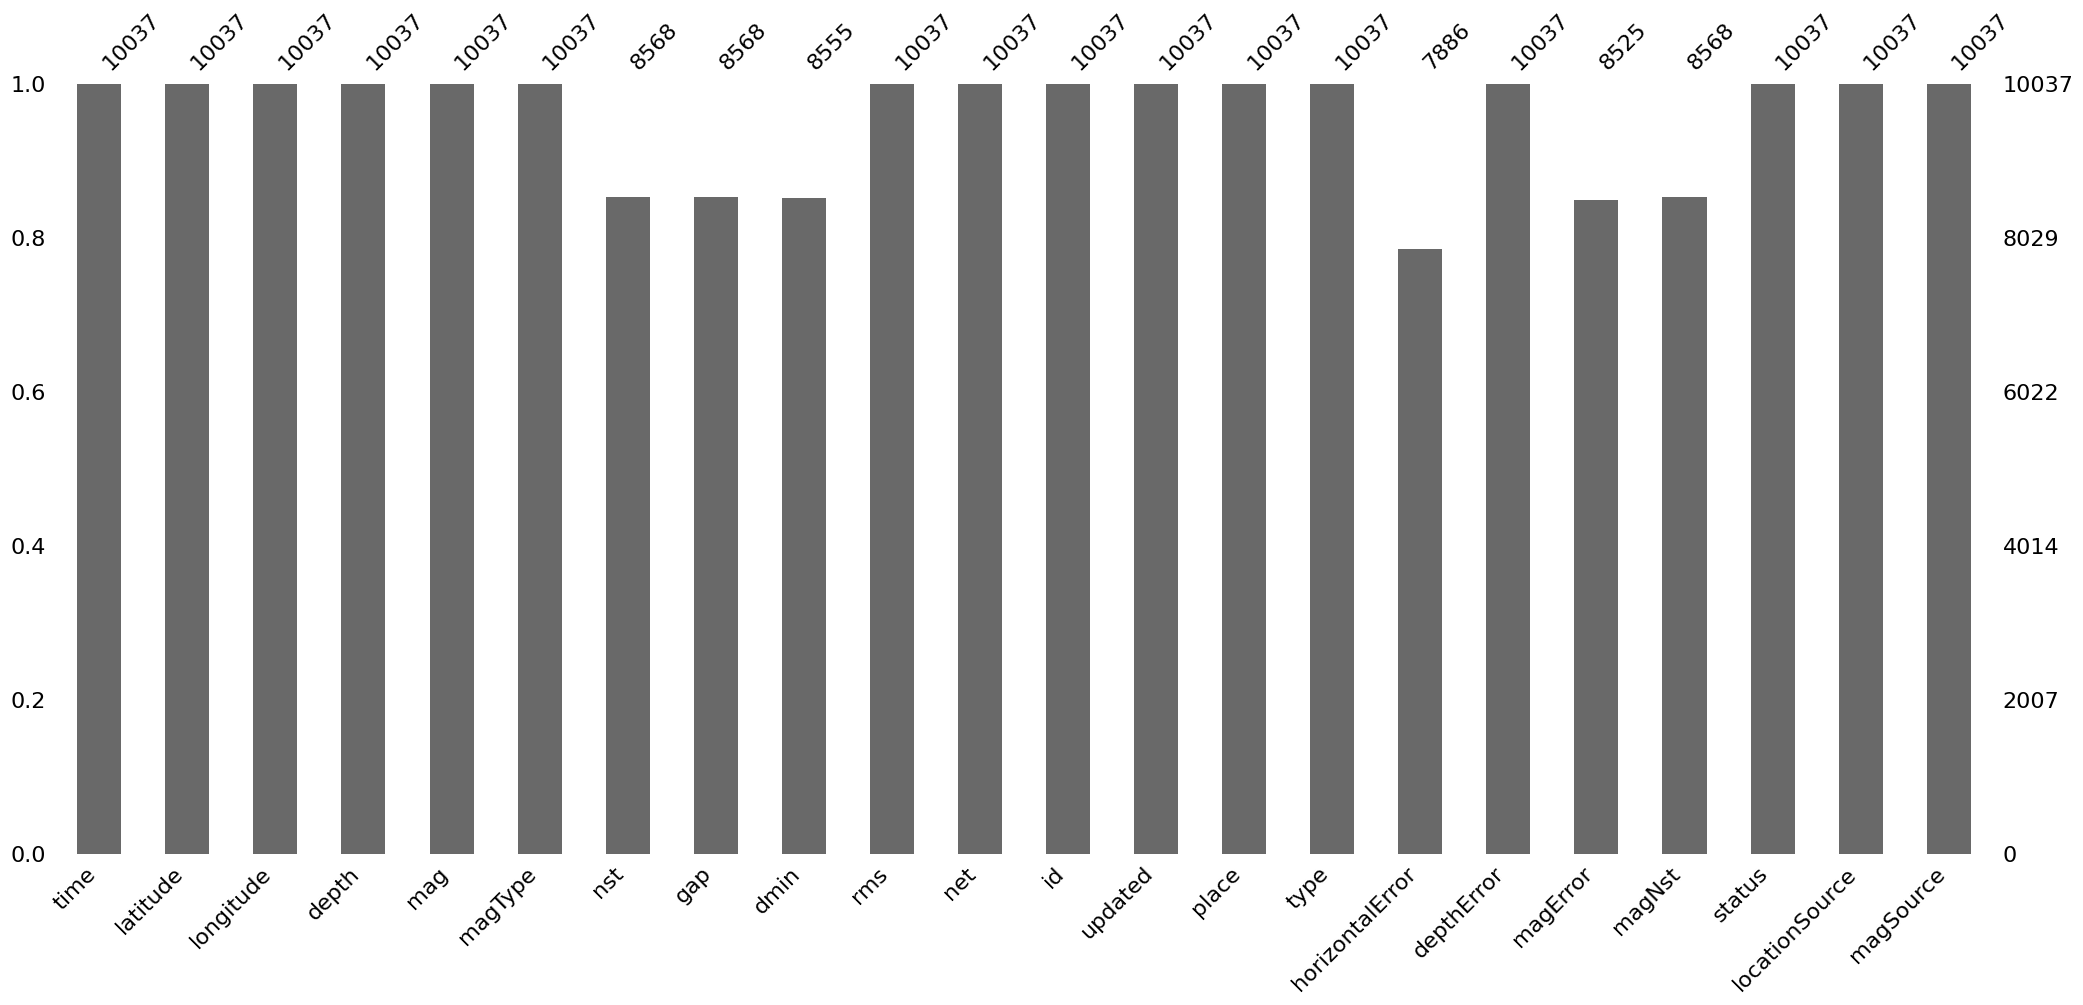

In [10]:
msno.bar(earthquake)

<Axes: >

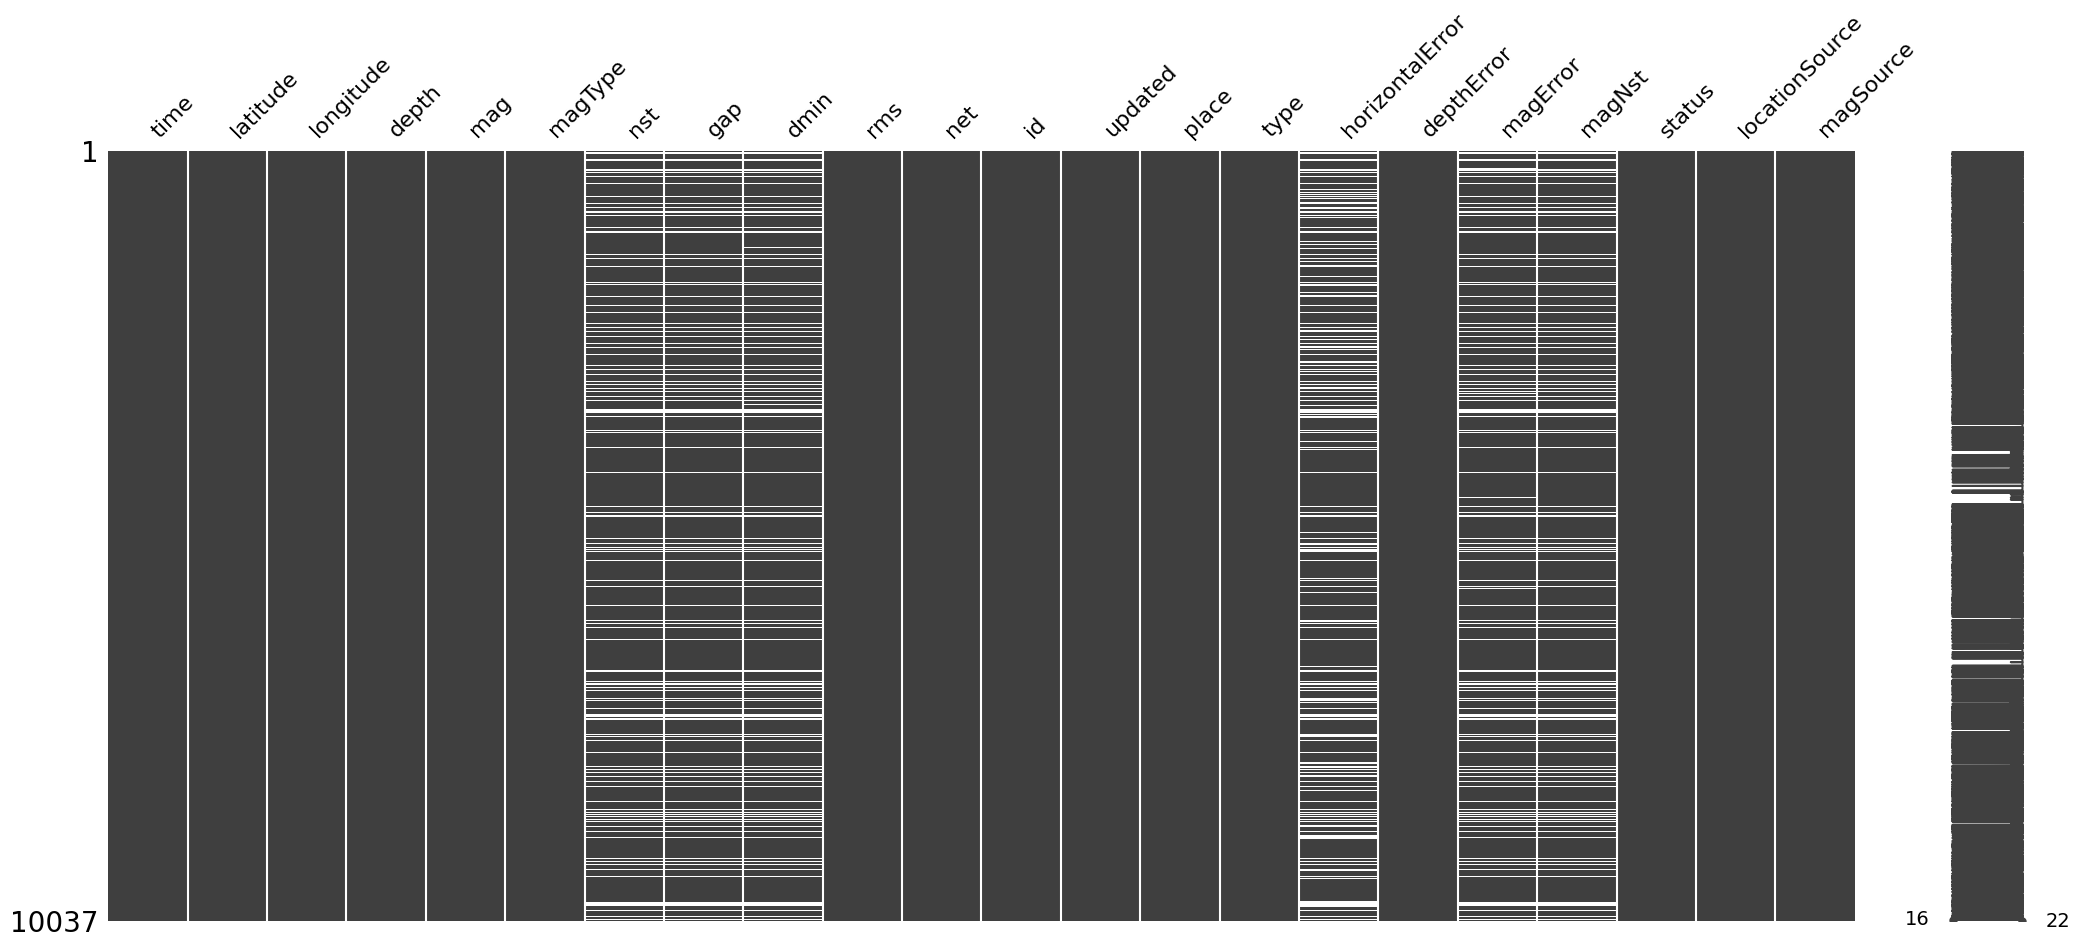

In [11]:
msno.matrix(earthquake)

<Axes: >

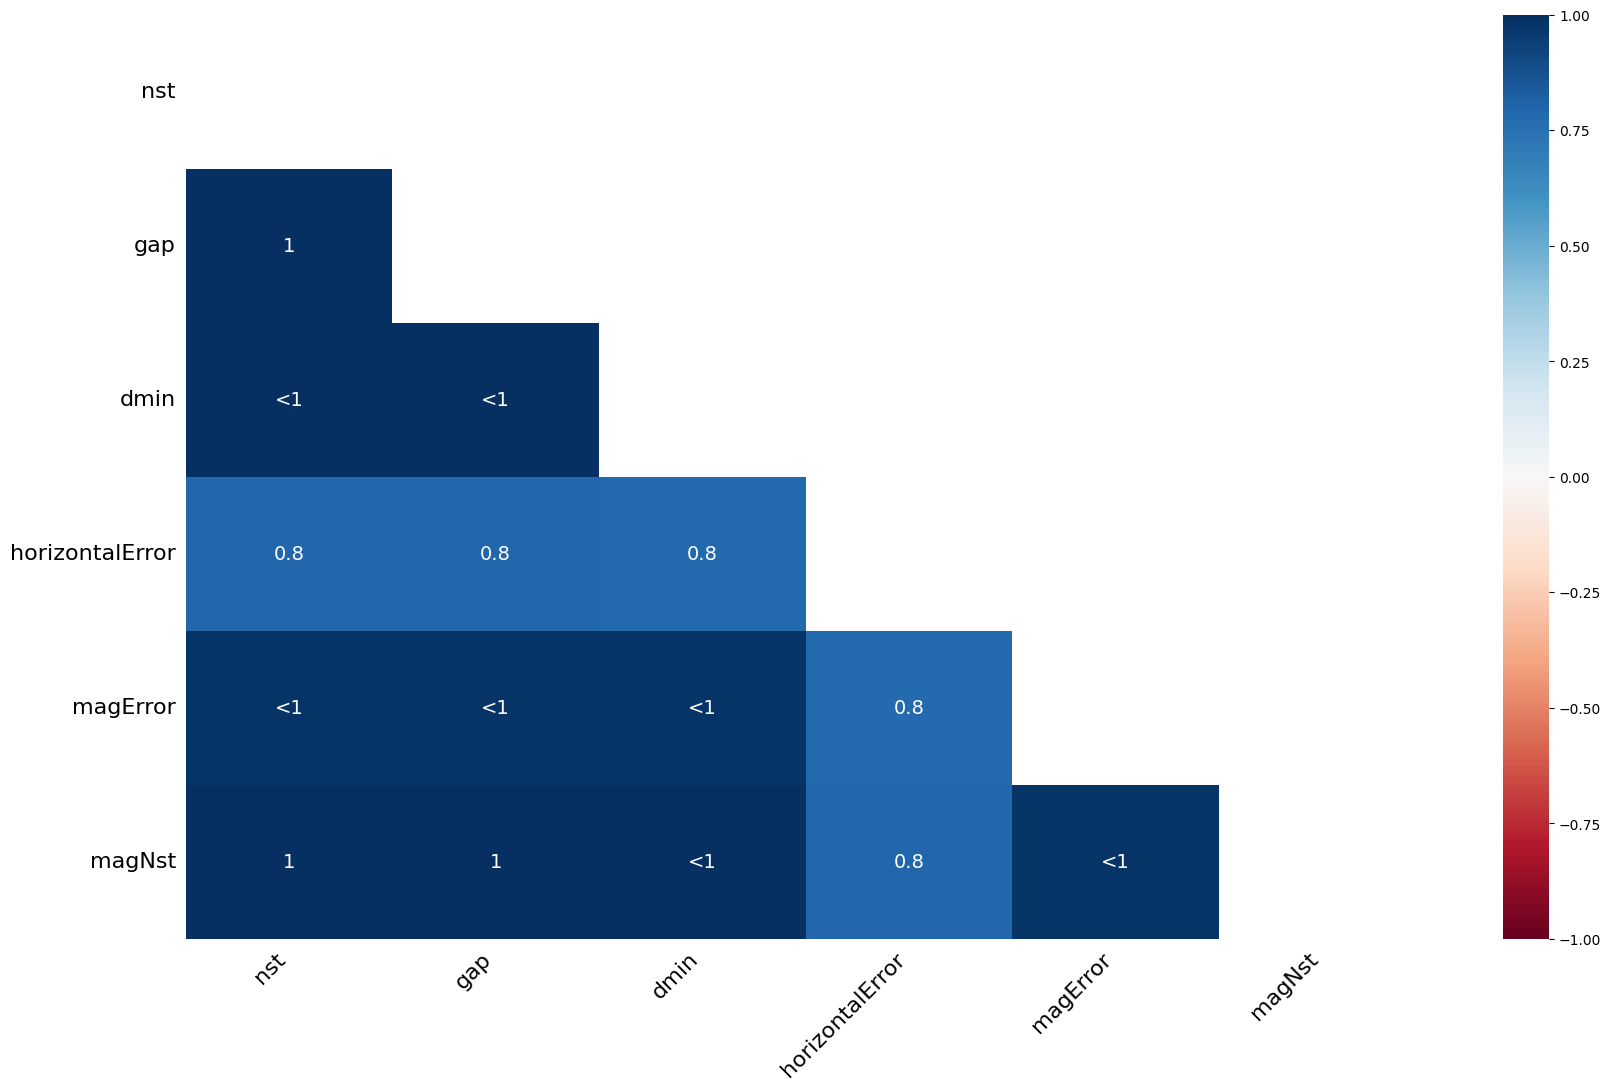

In [12]:
msno.heatmap(earthquake)

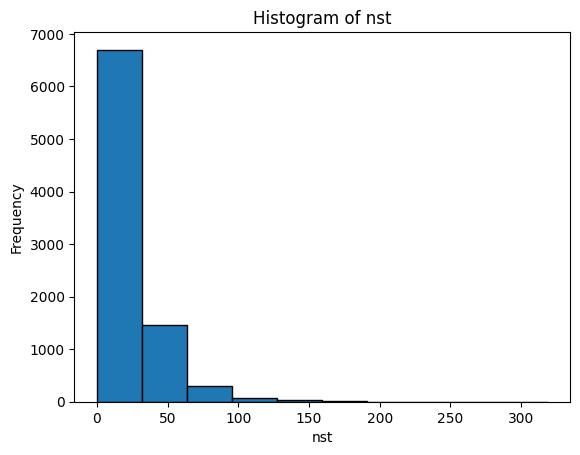

In [13]:
plt.hist(earthquake['nst'], bins=10, edgecolor='black')
plt.xlabel('nst')
plt.ylabel('Frequency')
plt.title('Histogram of nst')
plt.show()

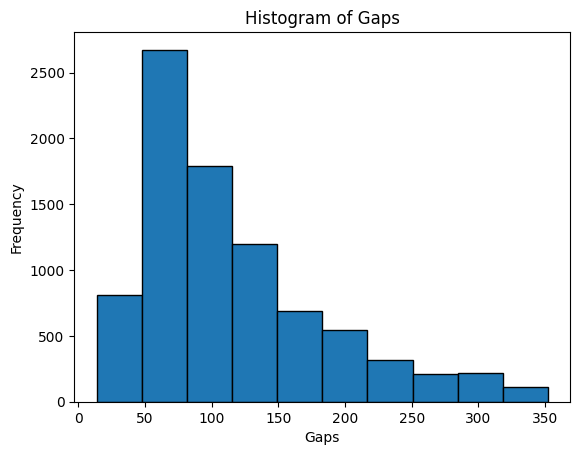

In [14]:
plt.hist(earthquake['gap'], bins=10, edgecolor='black')
plt.xlabel('Gaps')
plt.ylabel('Frequency')
plt.title('Histogram of Gaps')
plt.show()

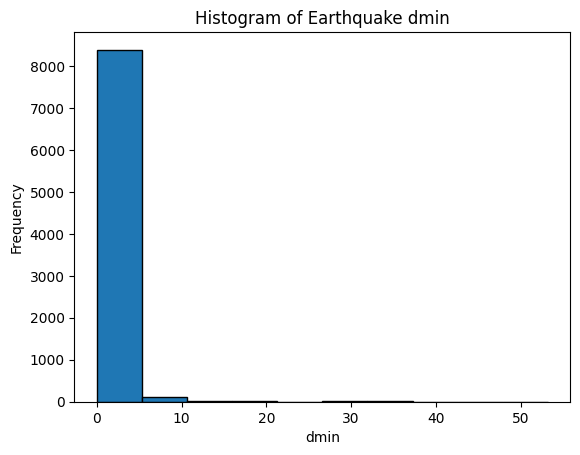

In [15]:
plt.hist(earthquake['dmin'], bins=10, edgecolor='black')
plt.xlabel('dmin')
plt.ylabel('Frequency')
plt.title('Histogram of Earthquake dmin')
plt.show()

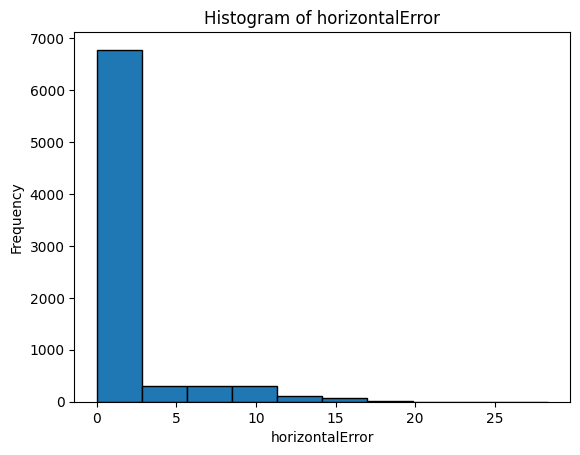

In [16]:
plt.hist(earthquake['horizontalError'], bins=10, edgecolor='black')
plt.xlabel('horizontalError')
plt.ylabel('Frequency')
plt.title('Histogram of horizontalError')
plt.show()

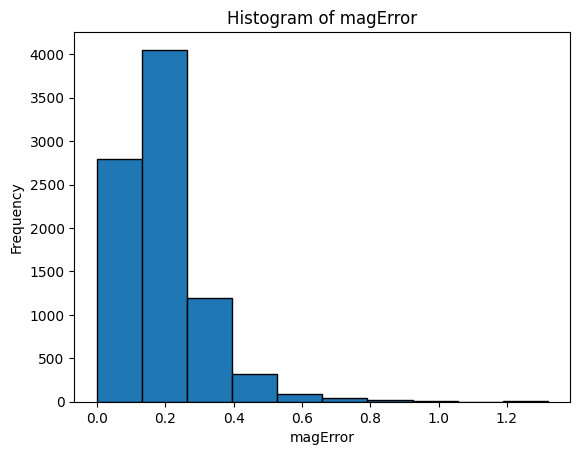

In [17]:
plt.hist(earthquake['magError'], bins=10, edgecolor='black')
plt.xlabel('magError')
plt.ylabel('Frequency')
plt.title('Histogram of magError')
plt.show()

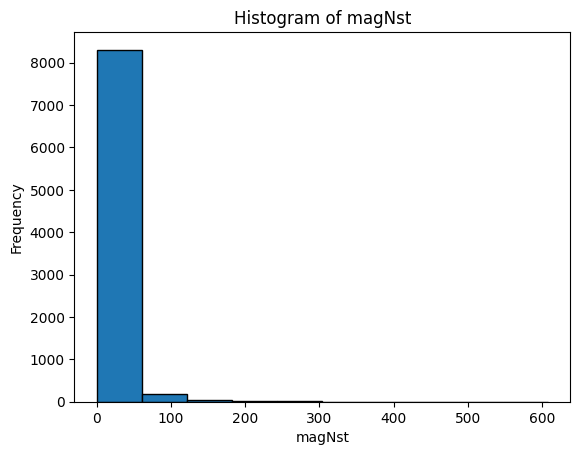

In [18]:
plt.hist(earthquake['magNst'], bins=10, edgecolor='black')
plt.xlabel('magNst')
plt.ylabel('Frequency')
plt.title('Histogram of magNst')
plt.show()

In [19]:
from sklearn.impute import SimpleImputer
impute_columns = ['nst', 'dmin', 'horizontalError', 'magNst']
imputer = SimpleImputer(strategy = 'median')
earthquake[impute_columns] = imputer.fit_transform(earthquake[impute_columns])

In [20]:
earthquake.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                   0
gap                1469
dmin                  0
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError       0
depthError            0
magError           1512
magNst                0
status                0
locationSource        0
magSource             0
dtype: int64

In [21]:
columns = ['gap', 'magError']
imputer = SimpleImputer(strategy = 'mean')
earthquake[columns] = imputer.fit_transform(earthquake[columns])

In [22]:
#Converting time and updated columns to datetime
earthquake['time'] = pd.to_datetime(earthquake['time'])
earthquake['updated'] = pd.to_datetime(earthquake['updated'])

In [23]:
#Extracting date and time separately
earthquake['time_date'] = earthquake['time'].dt.date
earthquake['time_time'] = earthquake['time'].dt.time

earthquake['updated_date'] = earthquake['updated'].dt.date
earthquake['updated_time'] = earthquake['updated'].dt.time

#Calculating the duration
earthquake['duration'] = earthquake['updated'] - earthquake['time']

In [24]:
earthquake

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magError,magNst,status,locationSource,magSource,time_date,time_time,updated_date,updated_time,duration
0,2024-06-23 02:43:55.360000+00:00,33.412498,-116.486168,12.1400,1.03,ml,19.0,102.0,0.127000,0.23,...,0.205000,7.0,automatic,ci,ci,2024-06-23,02:43:55.360000,2024-06-23,02:45:57.808000,0 days 00:02:02.448000
1,2024-06-23 02:36:14.460000+00:00,38.834835,-122.807335,2.2100,1.28,md,27.0,50.0,0.011620,0.02,...,0.180000,27.0,automatic,nc,nc,2024-06-23,02:36:14.460000,2024-06-23,02:37:51.798000,0 days 00:01:37.338000
2,2024-06-23 02:28:48.780000+00:00,38.840168,-122.873001,1.8700,0.27,md,8.0,97.0,0.003424,0.05,...,0.170000,8.0,automatic,nc,nc,2024-06-23,02:28:48.780000,2024-06-23,02:30:27.436000,0 days 00:01:38.656000
3,2024-06-23 02:28:34.590000+00:00,19.390333,-155.253326,0.6700,1.89,md,18.0,49.0,0.005162,0.12,...,0.250000,13.0,automatic,hv,hv,2024-06-23,02:28:34.590000,2024-06-23,02:30:14.310000,0 days 00:01:39.720000
4,2024-06-23 02:23:14.910000+00:00,38.777168,-122.766335,1.1100,1.02,md,9.0,88.0,0.006454,0.02,...,0.270000,10.0,automatic,nc,nc,2024-06-23,02:23:14.910000,2024-06-23,02:24:50.430000,0 days 00:01:35.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2024-05-24 02:54:42.020000+00:00,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,0.159675,7.0,reviewed,av,av,2024-05-24,02:54:42.020000,2024-05-25,05:04:45.910000,1 days 02:10:03.890000
10033,2024-05-24 02:54:40.240000+00:00,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,0.150000,12.0,automatic,nc,nc,2024-05-24,02:54:40.240000,2024-05-24,02:56:19.258000,0 days 00:01:39.018000
10034,2024-05-24 02:54:37.130000+00:00,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,0.130000,9.0,automatic,nc,nc,2024-05-24,02:54:37.130000,2024-05-24,02:56:14.293000,0 days 00:01:37.163000
10035,2024-05-24 02:53:35.771000+00:00,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,0.200000,15.0,reviewed,tx,tx,2024-05-24,02:53:35.771000,2024-05-24,14:48:25.442000,0 days 11:54:49.671000


In [25]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             10037 non-null  datetime64[ns, UTC]
 1   latitude         10037 non-null  float64            
 2   longitude        10037 non-null  float64            
 3   depth            10037 non-null  float64            
 4   mag              10037 non-null  float64            
 5   magType          10037 non-null  object             
 6   nst              10037 non-null  float64            
 7   gap              10037 non-null  float64            
 8   dmin             10037 non-null  float64            
 9   rms              10037 non-null  float64            
 10  net              10037 non-null  object             
 11  id               10037 non-null  object             
 12  updated          10037 non-null  datetime64[ns, UTC]
 13  place           

In [26]:
def process_duration(df, duration_col):
  df['duration_days'] = df[duration_col].dt.days
  df['duration_time'] = df[duration_col].dt.seconds

  #Converting time to minutes
  df['duration_minutes'] = df['duration_time']/60
  return df

process_duration(earthquake, 'duration')


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource,magSource,time_date,time_time,updated_date,updated_time,duration,duration_days,duration_time,duration_minutes
0,2024-06-23 02:43:55.360000+00:00,33.412498,-116.486168,12.1400,1.03,ml,19.0,102.0,0.127000,0.23,...,ci,ci,2024-06-23,02:43:55.360000,2024-06-23,02:45:57.808000,0 days 00:02:02.448000,0,122,2.033333
1,2024-06-23 02:36:14.460000+00:00,38.834835,-122.807335,2.2100,1.28,md,27.0,50.0,0.011620,0.02,...,nc,nc,2024-06-23,02:36:14.460000,2024-06-23,02:37:51.798000,0 days 00:01:37.338000,0,97,1.616667
2,2024-06-23 02:28:48.780000+00:00,38.840168,-122.873001,1.8700,0.27,md,8.0,97.0,0.003424,0.05,...,nc,nc,2024-06-23,02:28:48.780000,2024-06-23,02:30:27.436000,0 days 00:01:38.656000,0,98,1.633333
3,2024-06-23 02:28:34.590000+00:00,19.390333,-155.253326,0.6700,1.89,md,18.0,49.0,0.005162,0.12,...,hv,hv,2024-06-23,02:28:34.590000,2024-06-23,02:30:14.310000,0 days 00:01:39.720000,0,99,1.650000
4,2024-06-23 02:23:14.910000+00:00,38.777168,-122.766335,1.1100,1.02,md,9.0,88.0,0.006454,0.02,...,nc,nc,2024-06-23,02:23:14.910000,2024-06-23,02:24:50.430000,0 days 00:01:35.520000,0,95,1.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,2024-05-24 02:54:42.020000+00:00,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,av,av,2024-05-24,02:54:42.020000,2024-05-25,05:04:45.910000,1 days 02:10:03.890000,1,7803,130.050000
10033,2024-05-24 02:54:40.240000+00:00,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,nc,nc,2024-05-24,02:54:40.240000,2024-05-24,02:56:19.258000,0 days 00:01:39.018000,0,99,1.650000
10034,2024-05-24 02:54:37.130000+00:00,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,nc,nc,2024-05-24,02:54:37.130000,2024-05-24,02:56:14.293000,0 days 00:01:37.163000,0,97,1.616667
10035,2024-05-24 02:53:35.771000+00:00,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,tx,tx,2024-05-24,02:53:35.771000,2024-05-24,14:48:25.442000,0 days 11:54:49.671000,0,42889,714.816667


In [27]:
earthquake.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource,magSource,time_date,time_time,updated_date,updated_time,duration,duration_days,duration_time,duration_minutes
10032,2024-05-24 02:54:42.020000+00:00,58.256500,-155.093667,31.3400,-0.66,ml,7.0,97.0,0.069610,0.11,...,av,av,2024-05-24,02:54:42.020000,2024-05-25,05:04:45.910000,1 days 02:10:03.890000,1,7803,130.050000
10033,2024-05-24 02:54:40.240000+00:00,38.824665,-122.844002,1.9700,0.32,md,13.0,76.0,0.010460,0.01,...,nc,nc,2024-05-24,02:54:40.240000,2024-05-24,02:56:19.258000,0 days 00:01:39.018000,0,99,1.650000
10034,2024-05-24 02:54:37.130000+00:00,38.832668,-122.818336,1.9000,1.37,md,8.0,102.0,0.011290,0.01,...,nc,nc,2024-05-24,02:54:37.130000,2024-05-24,02:56:14.293000,0 days 00:01:37.163000,0,97,1.616667
10035,2024-05-24 02:53:35.771000+00:00,31.517000,-104.012000,7.3303,1.50,ml,24.0,62.0,0.000000,0.10,...,tx,tx,2024-05-24,02:53:35.771000,2024-05-24,14:48:25.442000,0 days 11:54:49.671000,0,42889,714.816667
10036,2024-05-24 02:49:34.160000+00:00,38.814835,-122.824837,2.0100,1.07,md,16.0,58.0,0.006856,0.02,...,nc,nc,2024-05-24,02:49:34.160000,2024-05-24,02:51:09.581000,0 days 00:01:35.421000,0,95,1.583333


In [28]:
earthquake.head(1)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,locationSource,magSource,time_date,time_time,updated_date,updated_time,duration,duration_days,duration_time,duration_minutes
0,2024-06-23 02:43:55.360000+00:00,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127,0.23,...,ci,ci,2024-06-23,02:43:55.360000,2024-06-23,02:45:57.808000,0 days 00:02:02.448000,0,122,2.033333


In [29]:
columns_to_drop = ['place', 'id', 'time', 'time_date', 'time_time', 'updated_time', 'duration', 'duration_days']
earthquake.drop(columns_to_drop, axis=1, inplace=True)

In [30]:
earthquake['duration_time'].unique()

array([  122,    97,    98, ...,  7188,  7803, 42889], dtype=int32)

In [31]:
earthquake.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,duration_time,duration_minutes
count,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000
mean,37.748876,-109.803759,20.514962,1.532087,21.999801,115.491135,0.430366,0.260827,1.384203,3.069083,0.192789,15.453622,25208.561423,420.142690
std,18.882656,73.657731,53.832264,1.236795,19.869753,63.639181,2.084155,0.273966,2.727608,78.588719,0.110137,23.618918,27882.550270,464.709171
min,-64.011900,-179.965700,-6.300000,-1.470000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.083333
25%,32.903500,-151.347800,2.480000,0.760000,10.000000,69.000000,0.013070,0.090000,0.300000,0.450000,0.125000,6.000000,158.000000,2.633333
50%,38.534167,-122.709833,6.880000,1.300000,17.000000,109.000000,0.043540,0.160000,0.443929,0.750000,0.192610,10.000000,13438.000000,223.966667
75%,51.830700,-115.121200,13.830000,1.970000,26.000000,137.000000,0.099880,0.320000,0.778589,1.600000,0.223000,16.000000,47183.000000,786.383333
max,82.905800,179.996500,651.481000,6.600000,319.000000,352.000000,53.210000,2.600000,28.350000,7836.900000,1.320000,608.000000,86398.000000,1439.966667


Savint the cleaned dataframe

In [32]:
earthquake.to_csv('cleaned_earthquake.csv',index=False)

EXPLORATORY

In [48]:
cleaned_earthquake = pd.read_csv('/content/cleaned_earthquake.csv')
cleaned_earthquake.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,updated_date,duration_time,duration_minutes
0,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127000,0.23,ci,...,0.90,1.71,0.205,7.0,automatic,ci,ci,2024-06-23,122,2.033333
1,38.834835,-122.807335,2.21,1.28,md,27.0,50.0,0.011620,0.02,nc,...,0.20,0.38,0.180,27.0,automatic,nc,nc,2024-06-23,97,1.616667
2,38.840168,-122.873001,1.87,0.27,md,8.0,97.0,0.003424,0.05,nc,...,0.71,1.08,0.170,8.0,automatic,nc,nc,2024-06-23,98,1.633333
3,19.390333,-155.253326,0.67,1.89,md,18.0,49.0,0.005162,0.12,hv,...,0.15,0.20,0.250,13.0,automatic,hv,hv,2024-06-23,99,1.650000
4,38.777168,-122.766335,1.11,1.02,md,9.0,88.0,0.006454,0.02,nc,...,0.30,0.49,0.270,10.0,automatic,nc,nc,2024-06-23,95,1.583333


In [49]:
cleaned_earthquake.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap',
       'dmin', 'rms', 'net', 'updated', 'type', 'horizontalError',
       'depthError', 'magError', 'magNst', 'status', 'locationSource',
       'magSource', 'updated_date', 'duration_time', 'duration_minutes'],
      dtype='object')

In [50]:
cleaned_earthquake['locationSource'].unique()

array(['ci', 'nc', 'hv', 'ak', 'tx', 'uw', 'nn', 'ok', 'us', 'pr', 'uu',
       'mb', 'av', 'se', 'nm'], dtype=object)

In [51]:
cleaned_earthquake['magSource'].unique()

array(['ci', 'nc', 'hv', 'ak', 'tx', 'uw', 'nn', 'ok', 'us', 'pr', 'uu',
       'mb', 'av', 'se', 'nm'], dtype=object)

In [52]:
cleaned_earthquake['net'].unique()

array(['ci', 'nc', 'hv', 'ak', 'tx', 'uw', 'nn', 'ok', 'us', 'pr', 'uu',
       'mb', 'av', 'se', 'nm'], dtype=object)

In [53]:
columns_to_drop = ['magSource', 'locationSource']
cleaned_earthquake.drop(columns_to_drop, axis=1, inplace=True)

In [54]:
cleaned_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          10037 non-null  float64
 1   longitude         10037 non-null  float64
 2   depth             10037 non-null  float64
 3   mag               10037 non-null  float64
 4   magType           10037 non-null  object 
 5   nst               10037 non-null  float64
 6   gap               10037 non-null  float64
 7   dmin              10037 non-null  float64
 8   rms               10037 non-null  float64
 9   net               10037 non-null  object 
 10  updated           10037 non-null  object 
 11  type              10037 non-null  object 
 12  horizontalError   10037 non-null  float64
 13  depthError        10037 non-null  float64
 14  magError          10037 non-null  float64
 15  magNst            10037 non-null  float64
 16  status            10037 non-null  object

In [55]:
cleaned_earthquake['magType'].unique()

array(['ml', 'md', 'mb', 'mwr', 'mw', 'mww', 'mb_lg', 'mh', 'mlr'],
      dtype=object)

In [56]:
cleaned_earthquake['type'].value_counts()

type
earthquake      9863
quarry blast     111
explosion         57
other event        4
ice quake          2
Name: count, dtype: int64

In [57]:
columns_to_drop = ['updated']
cleaned_earthquake.drop(columns_to_drop, axis=1, inplace=True)

In [58]:
cleaned_earthquake['updated_date'] = pd.to_datetime(cleaned_earthquake['updated_date'])

In [59]:
cleaned_earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   latitude          10037 non-null  float64       
 1   longitude         10037 non-null  float64       
 2   depth             10037 non-null  float64       
 3   mag               10037 non-null  float64       
 4   magType           10037 non-null  object        
 5   nst               10037 non-null  float64       
 6   gap               10037 non-null  float64       
 7   dmin              10037 non-null  float64       
 8   rms               10037 non-null  float64       
 9   net               10037 non-null  object        
 10  type              10037 non-null  object        
 11  horizontalError   10037 non-null  float64       
 12  depthError        10037 non-null  float64       
 13  magError          10037 non-null  float64       
 14  magNst            1003

EXPLORATORY DATA ANALYSIS

In [70]:
cleaned_earthquake.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,type,horizontalError,depthError,magError,magNst,status,updated_date,duration_time,duration_minutes
0,33.412498,-116.486168,12.14,1.03,ml,19.0,102.0,0.127000,0.23,ci,earthquake,0.90,1.71,0.205,7.0,automatic,2024-06-23,122,2.033333
1,38.834835,-122.807335,2.21,1.28,md,27.0,50.0,0.011620,0.02,nc,earthquake,0.20,0.38,0.180,27.0,automatic,2024-06-23,97,1.616667
2,38.840168,-122.873001,1.87,0.27,md,8.0,97.0,0.003424,0.05,nc,earthquake,0.71,1.08,0.170,8.0,automatic,2024-06-23,98,1.633333
3,19.390333,-155.253326,0.67,1.89,md,18.0,49.0,0.005162,0.12,hv,earthquake,0.15,0.20,0.250,13.0,automatic,2024-06-23,99,1.650000
4,38.777168,-122.766335,1.11,1.02,md,9.0,88.0,0.006454,0.02,nc,earthquake,0.30,0.49,0.270,10.0,automatic,2024-06-23,95,1.583333


In [71]:
cleaned_earthquake.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,updated_date,duration_time,duration_minutes
count,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037.000000,10037,10037.000000,10037.000000
mean,37.748876,-109.803759,20.514962,1.532087,21.999801,115.491135,0.430366,0.260827,1.384203,3.069083,0.192789,15.453622,2024-06-09 14:17:30.911627008,25208.561423,420.142690
min,-64.011900,-179.965700,-6.300000,-1.470000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-05-24 00:00:00,5.000000,0.083333
25%,32.903500,-151.347800,2.480000,0.760000,10.000000,69.000000,0.013070,0.090000,0.300000,0.450000,0.125000,6.000000,2024-06-03 00:00:00,158.000000,2.633333
50%,38.534167,-122.709833,6.880000,1.300000,17.000000,109.000000,0.043540,0.160000,0.443929,0.750000,0.192610,10.000000,2024-06-10 00:00:00,13438.000000,223.966667
75%,51.830700,-115.121200,13.830000,1.970000,26.000000,137.000000,0.099880,0.320000,0.778589,1.600000,0.223000,16.000000,2024-06-17 00:00:00,47183.000000,786.383333
max,82.905800,179.996500,651.481000,6.600000,319.000000,352.000000,53.210000,2.600000,28.350000,7836.900000,1.320000,608.000000,2024-06-23 00:00:00,86398.000000,1439.966667
std,18.882656,73.657731,53.832264,1.236795,19.869753,63.639181,2.084155,0.273966,2.727608,78.588719,0.110137,23.618918,NaN,27882.550270,464.709171


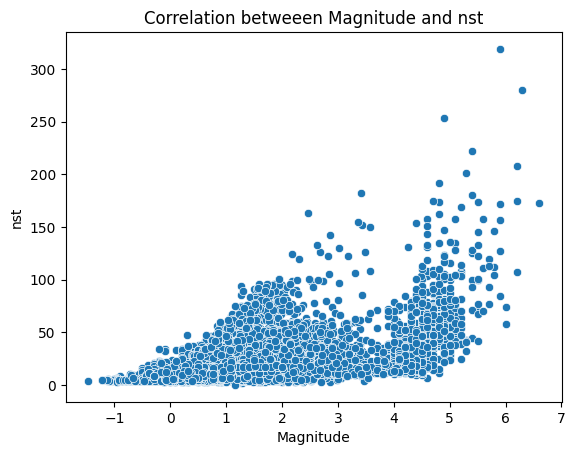

In [77]:
sns.scatterplot(x='mag', y='nst', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('nst')
plt.title('Correlation betweeen Magnitude and nst')
plt.show()

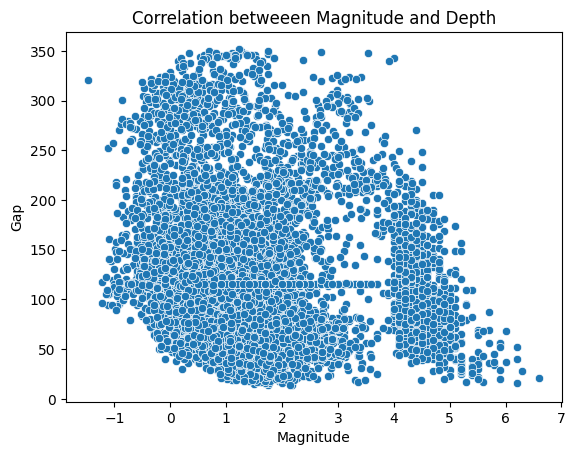

In [78]:
sns.scatterplot(x='mag', y='gap', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('Gap')
plt.title('Correlation betweeen Magnitude and Depth')
plt.show()

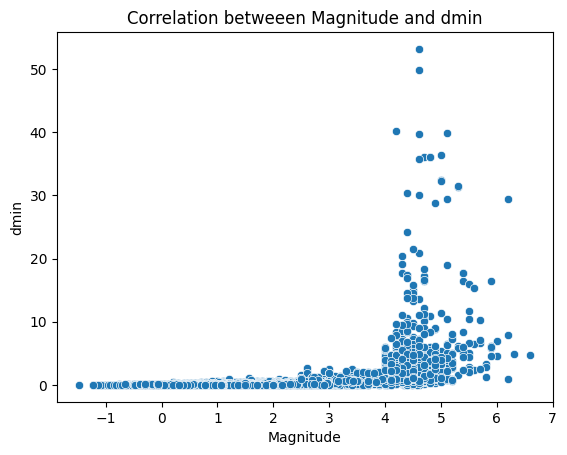

In [79]:
sns.scatterplot(x='mag', y='dmin', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('dmin')
plt.title('Correlation betweeen Magnitude and dmin')
plt.show()

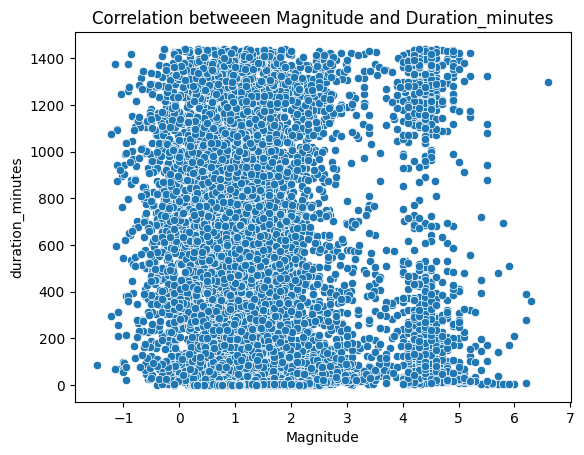

In [81]:
sns.scatterplot(x='mag', y='duration_minutes', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('duration_minutes')
plt.title('Correlation betweeen Magnitude and Duration_minutes')
plt.show()

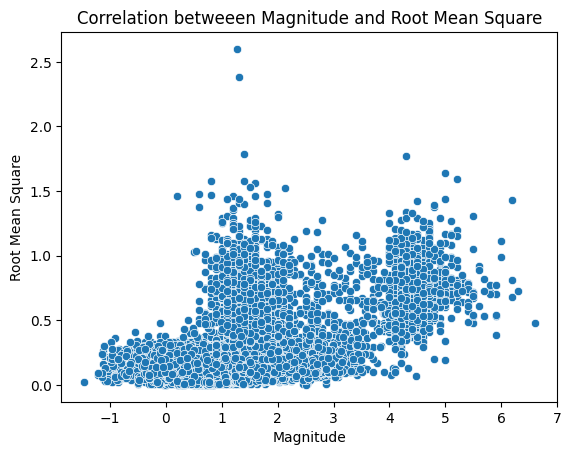

In [82]:
sns.scatterplot(x='mag', y='rms', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('Root Mean Square')
plt.title('Correlation betweeen Magnitude and Root Mean Square')
plt.show()

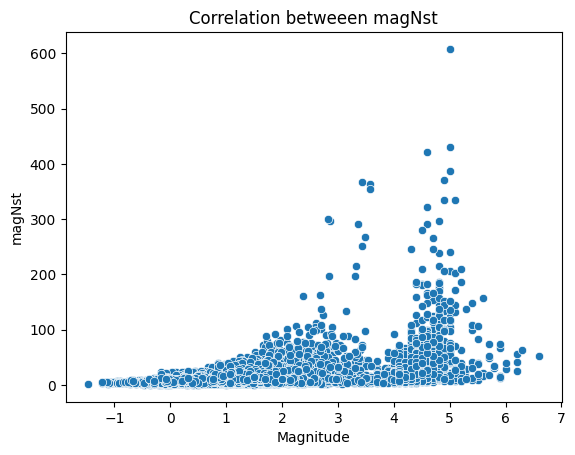

In [83]:
sns.scatterplot(x='mag', y='magNst', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('magNst')
plt.title('Correlation betweeen magNst')
plt.show()

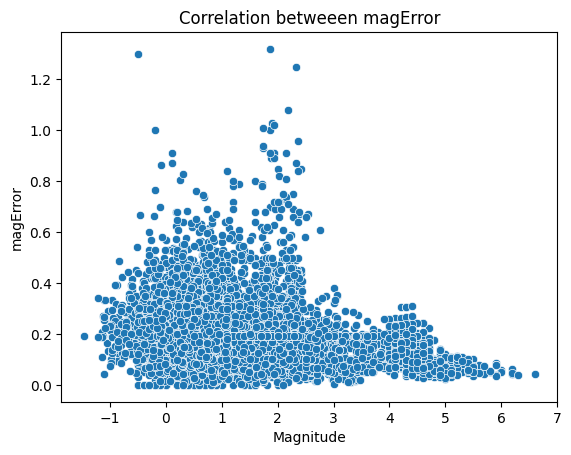

In [84]:
sns.scatterplot(x='mag', y='magError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('magError')
plt.title('Correlation betweeen magError')
plt.show()

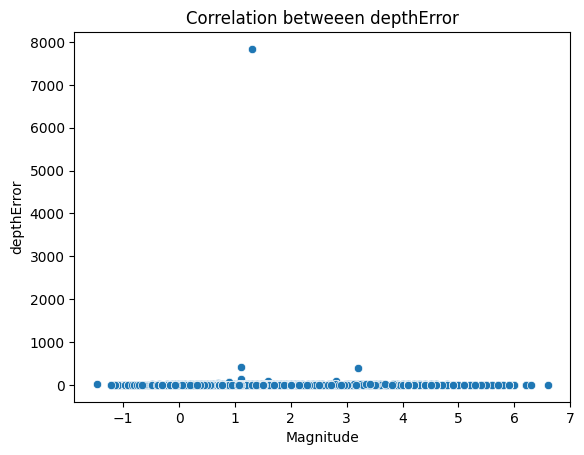

In [85]:
sns.scatterplot(x='mag', y='depthError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('depthError')
plt.title('Correlation betweeen depthError')
plt.show()

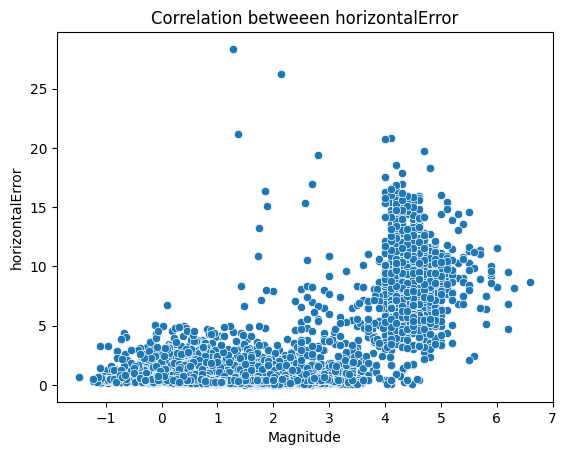

In [86]:
sns.scatterplot(x='mag', y='horizontalError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('horizontalError')
plt.title('Correlation betweeen horizontalError')
plt.show()

In [ ]:
sns.scatterplot(x='mag', y='depthError', data=cleaned_earthquake)

plt.xlabel('Magnitude')
plt.ylabel('depthError')
plt.title('Correlation betweeen depthError')
plt.show()

**DATA ENCODING**

In [45]:
cleaned_earthquake['net']

0        ci
1        nc
2        nc
3        hv
4        nc
         ..
10032    av
10033    nc
10034    nc
10035    tx
10036    nc
Name: net, Length: 10037, dtype: object

In [87]:
from sklearn.preprocessing import OneHotEncoder
clean_earthquake_encoded = pd.get_dummies(cleaned_earthquake, columns=['net', 'type', 'magType', 'status'], drop_first=True)
#clean_earthquake_encoded = clean_earthquake_encoded.replace({'automatic':1, 'reviewed':0})
clean_earthquake_encoded = clean_earthquake_encoded.astype(int)
clean_earthquake_encoded.head()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,...,type_quarry blast,magType_mb_lg,magType_md,magType_mh,magType_ml,magType_mlr,magType_mw,magType_mwr,magType_mww,status_reviewed
0,33,-116,12,1,19,102,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38,-122,2,1,27,50,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,38,-122,1,0,8,97,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,19,-155,0,1,18,49,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,38,-122,1,1,9,88,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [62]:
clean_earthquake_encoded.shape

(10037, 42)

In [68]:
clean_earthquake_encoded['mag'].unique()

array([ 1,  0,  2,  3,  5,  4, -1,  6])